In [18]:
import numpy as np
import geopandas as gpd
import matplotlib
from osgeo import gdal, ogr
import sys
from matplotlib import pyplot as plt
%matplotlib inline

In [19]:
import os
import gdal
import scipy.ndimage

from shapely.geometry import shape, mapping
from shapely.geometry.multipolygon import MultiPolygon

src_ds = gdal.Open('/Users/rohankumar/Desktop/GeoPlanetary_Project/pds-geosciences.wustl.edu/mex/mex-m-hrsc-5-refdr-dtm-v1/mexhrs_2001/data/0360/h0360_0000_re4.img')
srcband = src_ds.GetRasterBand(1)

# Invert pixel value to use srcband as a mask.
numpy_band = srcband.ReadAsArray() ##
numpy_band[numpy_band<125] = 125   ##
numpy_band[numpy_band>125] = 0     ##
srcband.WriteArray(numpy_band)     ##
numpy_band

array([[125, 125, 125, ..., 125, 125, 125],
       [125, 125, 125, ..., 125, 125, 125],
       [125, 125, 125, ..., 125, 125, 125],
       ...,
       [125, 125, 125, ..., 125, 125, 125],
       [125, 125, 125, ..., 125, 125, 125],
       [125, 125, 125, ..., 125, 125, 125]], dtype=uint8)

In [20]:
src_ds.GetProjection()

'PROJCS["SINUSOIDAL MARS",GEOGCS["GCS_MARS",DATUM["D_MARS",SPHEROID["MARS",3396000,0]],PRIMEM["Reference_Meridian",0],UNIT["degree",0.0174532925199433]],PROJECTION["Sinusoidal"],PARAMETER["longitude_of_center",285],PARAMETER["false_easting",0],PARAMETER["false_northing",0]]'

In [21]:
dst_layername = "polygonized_Stuff"
# set up the shapefile driver
drv = ogr.GetDriverByName("ESRI Shapefile")
# create the data source
dst_ds = drv.CreateDataSource( dst_layername + ".shp" )
# create the layer
dst_layer = dst_ds.CreateLayer(dst_layername, srs = None )


gdal.Polygonize( srcband, srcband, dst_layer, -1, [], callback=None )  ##
dst_ds.Destroy()
src_ds=None

Reprojecting

In [22]:
import geopandas as gpd
shapefile = gpd.read_file("/Users/rohankumar/geoplanetary_adv_project/polygonized_Stuff.shp")
print(shapefile)

       FID                                           geometry
0        0  POLYGON ((104250 180730, 105450 180730, 105450...
1        1  POLYGON ((106750 180730, 107950 180730, 107950...
2        2  POLYGON ((109250 180730, 110350 180730, 110350...
3        3  POLYGON ((111750 180730, 112750 180730, 112750...
4        4  POLYGON ((114050 180730, 115250 180730, 115250...
5        5  POLYGON ((116550 180730, 117750 180730, 117750...
6        6  POLYGON ((119050 180730, 120150 180730, 120150...
7        7  POLYGON ((121550 180730, 122650 180730, 122650...
8        8  POLYGON ((123850 180730, 125150 180730, 125150...
9        9  POLYGON ((126350 180730, 127550 180730, 127550...
10      10  POLYGON ((-119850 180730, 103650 180730, 10365...
11      11  POLYGON ((-85850 -15870, -85650 -15870, -85650...
12      12  POLYGON ((-30850 -16070, -30750 -16070, -30750...
13      13  POLYGON ((-31050 -16470, -30850 -16470, -30850...
14      14  POLYGON ((-84850 -17070, -84550 -17070, -84550...
15      

In [23]:
shapefile.crs

{}

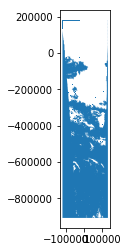

In [24]:
ax = shapefile.plot()

In [25]:
ax.set_title("WGS84:")

Text(0.5, 1.0, 'WGS84:')

Reproject to Mercator (after dropping Antartica)

In [33]:
import rasterio
import rasterio.features
import rasterio.warp

with rasterio.open(shapefile) as dataset:

    # Read the dataset's valid data mask as a ndarray.
    mask = dataset.dataset_mask()

    # Extract feature shapes and values from the array.
    for geom, val in rasterio.features.shapes(
            mask, transform=dataset.transform):

        # Transform shapes from the dataset's own coordinate
        # reference system to CRS84 (EPSG:4326).
        geom = rasterio.warp.transform_geom(
            dataset.crs, 'EPSG:4326', geom, precision=6)

        # Print GeoJSON shapes to stdout.
        print(geom)

TypeError: invalid path or file:        FID                                           geometry
0        0  POLYGON ((104250 180730, 105450 180730, 105450...
1        1  POLYGON ((106750 180730, 107950 180730, 107950...
2        2  POLYGON ((109250 180730, 110350 180730, 110350...
3        3  POLYGON ((111750 180730, 112750 180730, 112750...
4        4  POLYGON ((114050 180730, 115250 180730, 115250...
5        5  POLYGON ((116550 180730, 117750 180730, 117750...
6        6  POLYGON ((119050 180730, 120150 180730, 120150...
7        7  POLYGON ((121550 180730, 122650 180730, 122650...
8        8  POLYGON ((123850 180730, 125150 180730, 125150...
9        9  POLYGON ((126350 180730, 127550 180730, 127550...
10      10  POLYGON ((-119850 180730, 103650 180730, 10365...
11      11  POLYGON ((-85850 -15870, -85650 -15870, -85650...
12      12  POLYGON ((-30850 -16070, -30750 -16070, -30750...
13      13  POLYGON ((-31050 -16470, -30850 -16470, -30850...
14      14  POLYGON ((-84850 -17070, -84550 -17070, -84550...
15      15  POLYGON ((-82850 -17070, -82750 -17070, -82750...
16      16  POLYGON ((-85750 -16070, -85550 -16070, -85550...
17      17  POLYGON ((-84450 -17370, -84350 -17370, -84350...
18      18  POLYGON ((-87850 -18670, -87750 -18670, -87750...
19      19  POLYGON ((-78050 -19170, -77850 -19170, -77850...
20      20  POLYGON ((-90050 -18770, -89450 -18770, -89450...
21      21  POLYGON ((-89050 -19270, -88750 -19270, -88750...
22      22  POLYGON ((-88750 -19570, -88550 -19570, -88550...
23      23  POLYGON ((-94750 -20270, -94650 -20270, -94650...
24      24  POLYGON ((-75650 -21170, -75050 -21170, -75050...
25      25  POLYGON ((-77050 -22170, -76950 -22170, -76950...
26      26  POLYGON ((-74950 -22270, -74850 -22270, -74850...
27      27  POLYGON ((-98750 -22370, -98550 -22370, -98550...
28      28  POLYGON ((-96650 -22370, -96550 -22370, -96550...
29      29  POLYGON ((-95150 -22370, -94550 -22370, -94550...
...    ...                                                ...
5529  5529  POLYGON ((88950 -905770, 89250 -905770, 89250 ...
5530  5530  POLYGON ((46150 -905870, 46450 -905870, 46450 ...
5531  5531  POLYGON ((46550 -905870, 46650 -905870, 46650 ...
5532  5532  POLYGON ((49250 -905870, 49450 -905870, 49450 ...
5533  5533  POLYGON ((47350 -905970, 47450 -905970, 47450 ...
5534  5534  POLYGON ((88950 -905970, 89250 -905970, 89250 ...
5535  5535  POLYGON ((100550 -905970, 100750 -905970, 1007...
5536  5536  POLYGON ((57350 -906070, 57550 -906070, 57550 ...
5537  5537  POLYGON ((48250 -905770, 48350 -905770, 48350 ...
5538  5538  POLYGON ((47650 -905770, 47850 -905770, 47850 ...
5539  5539  POLYGON ((57850 -906070, 57950 -906070, 57950 ...
5540  5540  POLYGON ((86250 -906070, 86550 -906070, 86550 ...
5541  5541  POLYGON ((46750 -906170, 46950 -906170, 46950 ...
5542  5542  POLYGON ((81450 -906170, 81750 -906170, 81750 ...
5543  5543  POLYGON ((85650 -906170, 85850 -906170, 85850 ...
5544  5544  POLYGON ((87350 -906270, 87550 -906270, 87550 ...
5545  5545  POLYGON ((87650 -906270, 87750 -906270, 87750 ...
5546  5546  POLYGON ((86650 -906370, 87050 -906370, 87050 ...
5547  5547  POLYGON ((56950 -906570, 57050 -906570, 57050 ...
5548  5548  POLYGON ((87550 -906570, 87750 -906570, 87750 ...
5549  5549  POLYGON ((53650 -906670, 53850 -906670, 53850 ...
5550  5550  POLYGON ((78450 -906770, 78550 -906770, 78550 ...
5551  5551  POLYGON ((86650 -906770, 87150 -906770, 87150 ...
5552  5552  POLYGON ((44950 -906870, 45250 -906870, 45250 ...
5553  5553  POLYGON ((88650 -906270, 88950 -906270, 88950 ...
5554  5554  POLYGON ((57850 -907570, 58050 -907570, 58050 ...
5555  5555  POLYGON ((56850 -907670, 57050 -907670, 57050 ...
5556  5556  POLYGON ((128850 180730, 130550 180730, 130550...
5557  5557  POLYGON ((10950 -907970, 11350 -907970, 11350 ...
5558  5558  POLYGON ((11950 -908170, 12150 -908170, 12150 ...

[5559 rows x 2 columns]

In [48]:
import rasterio
from rasterio.features import shapes
mask = None
#with rasterio.drivers():
with rasterio.open('/Users/rohankumar/Desktop/GeoPlanetary_Project/pds-geosciences.wustl.edu/mex/mex-m-hrsc-5-refdr-dtm-v1/mexhrs_2001/data/0360/h0360_0000_re4.img') as src:
        image = src.read(1) # first band
        results = (
        {'properties': {'raster_val': v}, 'geometry': s}
        for i, (s, v) 
        in enumerate(shapes(image, mask=mask, transform=src.transform)))

geoms = list(results)
 # first feature
print (geoms[0])

from shapely.geometry import shape
print (shape(geoms[0]['geometry']))

{'properties': {'raster_val': 0.0}, 'geometry': {'type': 'Polygon', 'coordinates': [[(104250.0, 180730.0), (104250.0, 180630.0), (105450.0, 180630.0), (105450.0, 180730.0), (104250.0, 180730.0)]]}}
POLYGON ((104250 180730, 104250 180630, 105450 180630, 105450 180730, 104250 180730))


In [68]:
from shapely.geometry import shape
print (shape(geoms[9]['geometry']))

POLYGON ((109050 180730, 109050 180630, 109150 180630, 109150 180730, 109050 180730))


In [21]:
from shapely.geometry import mapping, Polygon

In [22]:
import fiona

In [ ]:
schema = {'geometry':'Polygon',
          'properties': {'id':'int'},
         }
with fiona.open('my_shp.shp','w', 'ESRI Shapefile', schema) as c:
    c.write({
        'geometry':mapping(gpd_polygonized_raster),
        'properties': {'id':123},
    })

In [50]:
geoms

[{'properties': {'raster_val': 0.0},
  'geometry': {'type': 'Polygon',
   'coordinates': [[(104250.0, 180730.0),
     (104250.0, 180630.0),
     (105450.0, 180630.0),
     (105450.0, 180730.0),
     (104250.0, 180730.0)]]}},
 {'properties': {'raster_val': 214.0},
  'geometry': {'type': 'Polygon',
   'coordinates': [[(106050.0, 180730.0),
     (106050.0, 180530.0),
     (106150.0, 180530.0),
     (106150.0, 180730.0),
     (106050.0, 180730.0)]]}},
 {'properties': {'raster_val': 215.0},
  'geometry': {'type': 'Polygon',
   'coordinates': [[(106150.0, 180730.0),
     (106150.0, 180530.0),
     (106250.0, 180530.0),
     (106250.0, 180730.0),
     (106150.0, 180730.0)]]}},
 {'properties': {'raster_val': 215.0},
  'geometry': {'type': 'Polygon',
   'coordinates': [[(106450.0, 180730.0),
     (106450.0, 180230.0),
     (106550.0, 180230.0),
     (106550.0, 180730.0),
     (106450.0, 180730.0)]]}},
 {'properties': {'raster_val': 0.0},
  'geometry': {'type': 'Polygon',
   'coordinates': [[(10

In [69]:
import geopandas as gp
gpd_polygonized_raster  = gp.GeoDataFrame.from_features(geoms)

In [ ]:
gpd_polygonized_raster[10]